In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from pylab import rcParams
rcParams['figure.figsize'] = 8,8
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
import os 
my_path = os.path.abspath('/home/juan/Desktop/3level_img/')
#System variables
class variables():
    def __init__(self):
         #eigen energies
        self.w10 = 20
        self.w2w1 = 1.6
        self.w20 = self.w10*self.w2w1
        #carnot efficiency
        self.n_c  =np.arange(1e-6,1,0.02)
        #temperatures
        self.b_l  = 1/np.array([150,50,25])[1] 
        self.b_h  = (1-self.n_c)*self.b_l
       #energy variables
        self.lw = np.linspace(0,np.sqrt(self.w2w1),100)
        self.e_20 = self.w10*((1+self.w2w1 )/2 + np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2  ))
        self.e_10 = self.w10*((1+self.w2w1 )/2 - np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2  ))
       #lindblad constants
        self.g_l10  = 100
        self.g_h10 =  self.g_l10
        self.g_h20  = self.g_l10*5
        self.g_l20 = self.g_h20
       
        #cosine data
        self.c    = (self.w2w1 -1 )/(2*np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2 ))
        #power variables
    def g1(self):
        return 1/2*(self.g_l10*(1+self.c) + self.g_h10*(1-self.c))
    def g2(self):
        return 1/2*(self.g_l20*(1-self.c) + self.g_h20*(1+self.c)) 
    def g1m(self):
        result=[]
        for value in range(len(self.b_h)):
            result.append(1/2*(self.g_l10*(1+self.c)*np.exp(-self.b_l*self.e_10)\
                        + self.g_h10*(1-self.c)*np.exp(-self.b_h[value]*self.e_10)))
        return result
    def g2m(self):
        result=[]
        for value in range(len(self.b_h)):
            result.append(1/2*(self.g_l20*(1-self.c)*np.exp(-self.b_l*self.e_20) \
                        + self.g_h20*(1+self.c)*np.exp(-self.b_h[value]*self.e_20)))
        return result

    def omega(self):
        return ((self.e_20-self.e_10)**2 + ( (self.g1()+self.g2())/2)**2)\
                /(self.w20)

    def G(self):
        return  1/2*(self.g1()+self.g2())*(1 + (1/(self.e_20-self.e_10)**2)\
                *(1/2*(self.g1()+self.g2()))**2)
             

        


In [19]:
       
 def POWER(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2m = var.g2m()
    g1m = var.g1m()
    g2 = var.g2()
    g1 = var.g1()
    omega = var.omega()
    w21 = var.w20- var.w10
    result =[]
    for value in range(len(var.b_h)):
        result.append( (1/2*(e_20-e_10)*(1-c**2)*omega\
                      *( (g2m[value]/g2) - (g1m[value]/g1)))\
                /( (1/2+(g2m[value]/g2))\
               *( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)))\
               +(1/2+(g1m[value]/g1))\
               * ( ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) )\
                ))
    return result


def P0(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g_l10  =  var.g_l10
    g_l20  =  var.g_l20 
    g_h20  =  var.g_h20  
    g_h10  =  var.g_h10 
    G_l10  =  var.g_l10/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_l20  =  (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    G_h10  =  (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_h20  =  var.g_h20/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    b_h    = var.b_h
    b_l    = var.b_l
    result = []
    for value in range(len(var.b_h)):
        result.append( e_10*g_h10*G_l10*((1-c)/2)*(np.exp(-b_h[value]*e_10)-np.exp(-b_l*e_10))
                      +e_20*g_h20*G_l20*((1+c)/2)*(np.exp(-b_h[value]*e_20)-np.exp(-b_l*e_20) ))
    return result

def R00(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2m = var.g2m()
    g1m = var.g1m()
    g2 = var.g2()
    g1 = var.g1()
    omega = var.omega()
    w21 = var.w20- var.w10
    result =[]
    for value in range(len(var.b_h)):
        result.append( ( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) +\
                ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) ) \
                /( (1/2+(g2m[value]/g2))\
               *( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)))\
               +(1/2+(g1m[value]/g1))\
               * ( ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) )\
                ))
    return result



def Ql(var,p,qd):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g_l10  =  var.g_l10
    g_l20  =  var.g_l20 
    g_h20  =  var.g_h20  
    g_h10  =  var.g_h10 
    G_l10  =  var.g_l10/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_l20  =  (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    G_h10  =  (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_h20  =  var.g_h20/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    return ( (e_20/(e_20 -e_10))*G_l20 -(e_10/(e_20 -e_10))*G_l10 )*p -qd

def Qh(var,p,qd):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g_l10  =  var.g_l10
    g_l20  =  var.g_l20 
    g_h20  =  var.g_h20  
    g_h10  =  var.g_h10 
    G_l10  =  var.g_l10/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_l20  =  (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    G_h10  =  (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_h20  =  var.g_h20/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    return ( (e_20/(e_20 -e_10))*G_h20 -(e_10/(e_20 -e_10))*G_h10 )*p +qd

def EFF(p,q):
    return p/q
        

<IPython.core.display.Javascript object>


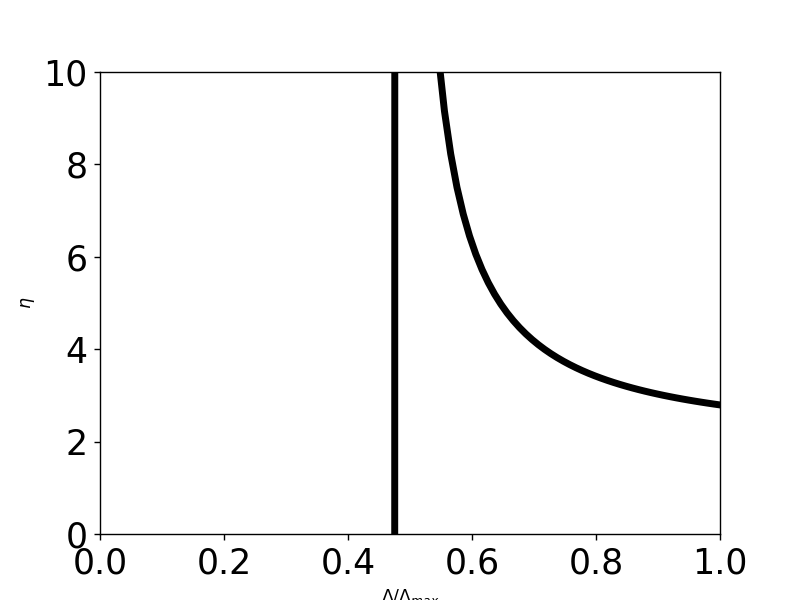

<ipython-input-19-ba2e025dea77>:101: RuntimeWarning: invalid value encountered in true_divide
  return p/q


In [64]:
%matplotlib nbagg
var = variables()
step = np.append(np.arange(0,10,0.1),np.arange(10,100,1))
var  = variables()
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
plt.style.use('seaborn-pastel')

        
ax1.set_xlabel(r'$\Lambda/\Lambda_{max}$')
ax1.set_ylabel(r'$\eta$')
line1, = ax1.plot([],[],color='black',lw=4)
#ax1.set_aspect('equal', 'datalim')
ax1.set_xlim(0,1)
ax1.set_ylim(0,10)



def init():
    line1.set_data([],[])
    return line1,

def animate(i):
    x = var.lw/max(var.lw)
    var.g_h10 =  var.g_l10*(i/100)
    var.g_l20 = var.g_h20*(i/100)
    P   = POWER(var)
    R   = np.array(R00(var))
    P_0 = np.array(P0(var))
    Q_d = R*P_0
    Q_l = Ql(var,P,Q_d)
    Q_h = Qh(var,P,Q_d)
    n   = EFF(P,Q_h)
    y   = n[10]   
   
    line1.set_data(x,y)
    return line1,


anim = FuncAnimation(fig, animate, frames= step, interval=50, blit=True)
anim.save("test.gif", writer="imagemagick")

    
       
    
    

    

        
        
        
        
        




<IPython.core.display.Javascript object>


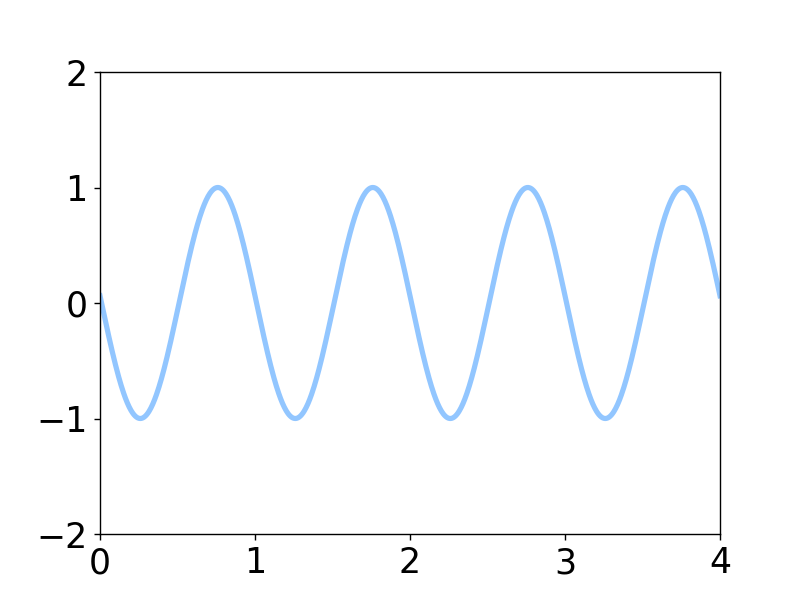

In [57]:
%matplotlib nbagg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

plt.show()